<a href="https://colab.research.google.com/github/enidroman/Data-620-Web-Analysis/blob/main/Data_620_Web_Analysis_Assignment_Data_Sets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Davis Southern Club Women Web Analysis**
### **by Enid Roman**

### **Data Background**

#### **Description**
This is a data set of 18 women observed over a nine-month period. During that period, various subsets of these women met in a series of 14 informal social events. The data recored which women met for which events.

#### **Attributes**
Each of the vertices in this two mode network has a 'name', representing a woman or event.

#### **Collection**
This data is originally from Davis, Gardner and Gardner (1941) via UCINET. This documentation is taken from Freeman (2003) in his usual lucid description.





#### **References**
https://networkx.org/documentation/stable/auto_examples/algorithms/plot_davis_club.html

#### **Creating the Graphs**
The following code & functions come from the NetworkX Davis Club page.

The davis_club_graph function creates a bipartite graph from the data.

The project function creates a unipartite projection of a bipartite graph

In [1]:
#!pip install community
#!pip install networkx matplotlib scipy
#!pip install --upgrade networkx


Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1

#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price

#Friend meetings, Member
50 Evelyn Jefferson

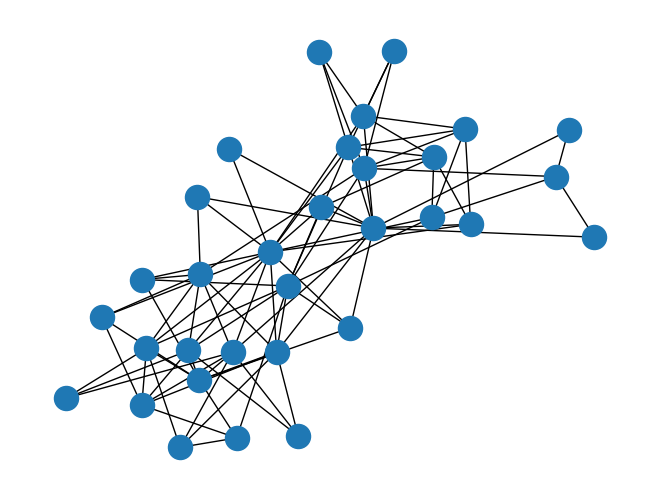

In [2]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
from tabulate import tabulate
from prettytable import PrettyTable
from community import community_louvain as community


G = nx.davis_southern_women_graph()
women = G.graph["top"]
clubs = G.graph["bottom"]

print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))

# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print()
print("#Friends, Member")
for w in women:
    print(f"{W.degree(w)} {w}")

# project bipartite graph onto women nodes keeping number of co-occurrence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print()
print("#Friend meetings, Member")
for w in women:
    print(f"{W.degree(w, weight='weight')} {w}")

pos = nx.spring_layout(G, seed=648)  # Seed layout for reproducible node positions
nx.draw(G, pos)
plt.show()

### **Analysis**

Here I split the dataset and visualize the bipartite graph into two unipartite graphs one for women and the other for clubs.

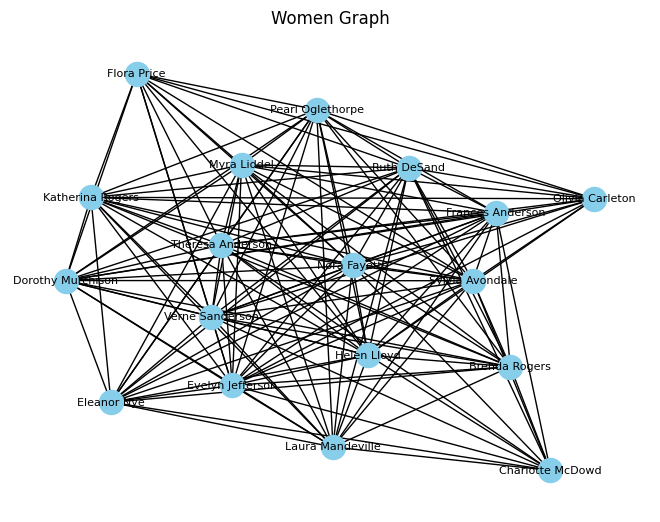

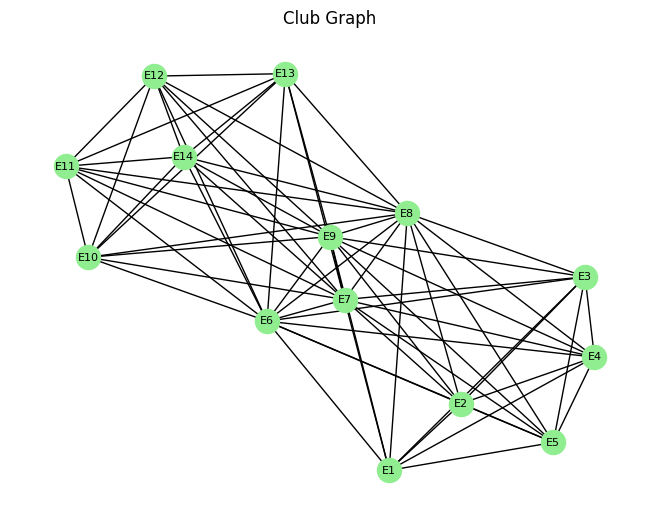

In [3]:
# Load the Davis Southern Women bipartite graph
G = nx.davis_southern_women_graph()
women = G.graph["top"]
clubs = G.graph["bottom"]

# Project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)

# Project bipartite graph onto club nodes
C = bipartite.projected_graph(G, clubs)

# Visualization for women
pos_women = nx.spring_layout(W, seed=648)  # Seed layout for reproducible node positions
nx.draw(W, pos_women, with_labels=True, font_size=8, node_color='skyblue')
plt.title('Women Graph')
plt.show()

# Visualization for clubs
pos_clubs = nx.spring_layout(C, seed=648)  # Seed layout for reproducible node positions
nx.draw(C, pos_clubs, with_labels=True, font_size=8, node_color='lightgreen')
plt.title('Club Graph')
plt.show()


#### **Number of Nodes, Edges, and Non Edges and Density for Women Graph and Club Graph**

In [4]:
# Get the number of nodes for women and clubs
num_nodes_women = W.number_of_nodes()
num_nodes_clubs = C.number_of_nodes()

print(f"Number of nodes in the Women graph: {num_nodes_women}")
print(f"Number of nodes in the Clubs graph: {num_nodes_clubs}")

Number of nodes in the Women graph: 18
Number of nodes in the Clubs graph: 14


In [5]:
# Get the number of edges for women and clubs
num_edges_women = W.number_of_edges()
num_edges_clubs = C.number_of_edges()

print(f"Number of edges in the Women graph: {num_edges_women}")
print(f"Number of edges in the Clubs graph: {num_edges_clubs}")

Number of edges in the Women graph: 139
Number of edges in the Clubs graph: 66


In [6]:
num_non_edges_women = len(list(nx.non_edges(W)))
num_non_edges_clubs = len(list(nx.non_edges(C)))

print(f"Number of non edges in the Women graph: {num_non_edges_women}")
print(f"Number of non edges in the Clubs graph: {num_non_edges_clubs}")

Number of non edges in the Women graph: 14
Number of non edges in the Clubs graph: 25


In graph theory, the density of a graph is a measure of how connected the graph is, and it is defined as the ratio of the actual number of edges to the total possible number of edges in the graph. The density ranges from 0 to 1. A density of 0 indicates a completely disconnected graph with no edges. A density of 1 indicates a fully connected graph where every possible edge is present.

The values 0.9084967320261438 for the Women graph and 0.7252747252747253 for the Clubs graph indicates a relatively high density in the Women graph. A large proportion of possible connections among women is present. Edges are formed between women, suggesting a high level of interconnectivity or relationships among them. The Clubs graph density value is somewhat lower than the Women graph. The Clubs graph is still relatively dense, but there are fewer connections among clubs compared to the possible maximum. It suggests that not all clubs are connected to each other, resulting in a slightly less dense structure compared to the Women graph.



In [7]:
density_edges_women = nx.density(W)
density_edges_clubs = nx.density(C)

print(f"Number of density edges in the Women graph: {density_edges_women}")
print(f"Number of density edges in the Clubs graph: {density_edges_clubs}")

Number of density edges in the Women graph: 0.9084967320261438
Number of density edges in the Clubs graph: 0.7252747252747253


#### **Centralities Comparison for Women Graph**

In [8]:
dgr = nx.degree_centrality(W)
clo = nx.closeness_centrality(W)
har = nx.harmonic_centrality(W)
eig = nx.eigenvector_centrality(W)
bet = nx.betweenness_centrality(W)
pgr = nx.pagerank(W)
hits = nx.hits(W)

centralities = pd.concat(
    [pd.Series(c) for c in (hits[1], eig, pgr, har, clo, hits[0], dgr, bet)],
    axis=1)

centralities.columns = ("Authorities", "Eigenvector", "PageRank",
                        "Harmonic Closeness", "Closeness", "Hubs",
                        "Degree", "Betweennness")

centralities["Harmonic Closeness"] /= centralities.shape[0]

centralities

,Authorities,Eigenvector,PageRank,Harmonic Closeness,Closeness,Hubs,Degree,Betweennness
Evelyn Jefferson,0.060091,0.253524,0.060474,0.944444,1.000000,0.060091,1.000000,0.010122
Laura Mandeville,0.054746,0.230973,0.054082,0.888889,0.894737,0.054746,0.882353,0.002674
Theresa Anderson,0.060091,0.253524,0.060474,0.944444,1.000000,0.060091,1.000000,0.010122
Brenda Rogers,0.054746,0.230973,0.054082,0.888889,0.894737,0.054746,0.882353,0.002674
Charlotte McDowd,0.040893,0.172527,0.041758,0.777778,0.739130,0.040893,0.647059,0.000000
Frances Anderson,0.054746,0.230973,0.054082,0.888889,0.894737,0.054746,0.882353,0.002674
Eleanor Nye,0.054746,0.230973,0.054082,0.888889,0.894737,0.054746,0.882353,0.002674
Pearl Oglethorpe,0.057634,0.243157,0.057231,0.916667,0.944444,0.057634,0.941176,0.005348
Ruth DeSand,0.060091,0.253524,0.060474,0.944444,1.000000,0.060091,1.000000,0.010122
Verne Sanderson,0.060091,0.253524,0.060474,0.944444,1.000000,0.060091,1.000000,0.010122


#### **Top Five Centralities Comparison for Women Graph**

In [9]:
centralities = pd.concat(
    [pd.Series(c) for c in (hits[1], eig, pgr, har, clo, hits[0], dgr, bet)],
    axis=1)

centralities.columns = ("Authorities", "Eigenvector", "PageRank",
                        "Harmonic Closeness", "Closeness", "Hubs",
                        "Degree", "Betweennness")

centralities["Harmonic Closeness"] /= centralities.shape[0]


# Sort top 5 nodes for each centrality measure in the DataFrame
top_nodes = pd.DataFrame(index=range(1, 6))  # Index for top 5 nodes

for column in centralities.columns:
    top_nodes[column] = centralities.nlargest(5, column).index

# Display the centralities table
print(tabulate(top_nodes, headers='keys', tablefmt='github'))

|    | Authorities      | Eigenvector      | PageRank         | Harmonic Closeness   | Closeness        | Hubs             | Degree           | Betweennness     |
|----|------------------|------------------|------------------|----------------------|------------------|------------------|------------------|------------------|
|  1 | Evelyn Jefferson | Evelyn Jefferson | Evelyn Jefferson | Evelyn Jefferson     | Evelyn Jefferson | Evelyn Jefferson | Evelyn Jefferson | Evelyn Jefferson |
|  2 | Theresa Anderson | Theresa Anderson | Theresa Anderson | Theresa Anderson     | Theresa Anderson | Theresa Anderson | Theresa Anderson | Theresa Anderson |
|  3 | Nora Fayette     | Ruth DeSand      | Ruth DeSand      | Ruth DeSand          | Ruth DeSand      | Ruth DeSand      | Ruth DeSand      | Ruth DeSand      |
|  4 | Ruth DeSand      | Verne Sanderson  | Verne Sanderson  | Verne Sanderson      | Verne Sanderson  | Verne Sanderson  | Verne Sanderson  | Verne Sanderson  |
|  5 | Verne Sanderson

#### **Community Detection for Women Graph**

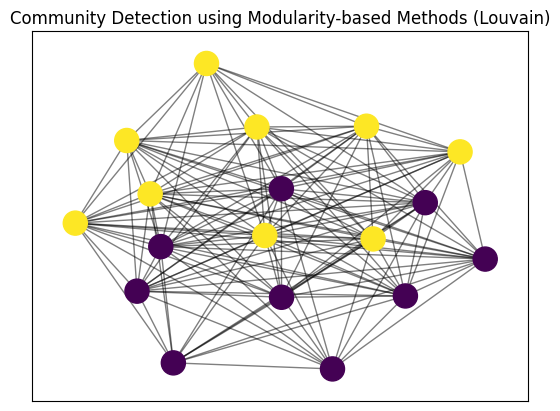

Node Evelyn Jefferson belongs to Community 1
Node Laura Mandeville belongs to Community 1
Node Theresa Anderson belongs to Community 1
Node Brenda Rogers belongs to Community 1
Node Charlotte McDowd belongs to Community 1
Node Frances Anderson belongs to Community 1
Node Eleanor Nye belongs to Community 1
Node Pearl Oglethorpe belongs to Community 0
Node Ruth DeSand belongs to Community 0
Node Verne Sanderson belongs to Community 1
Node Myra Liddel belongs to Community 0
Node Katherina Rogers belongs to Community 0
Node Sylvia Avondale belongs to Community 0
Node Nora Fayette belongs to Community 0
Node Helen Lloyd belongs to Community 1
Node Dorothy Murchison belongs to Community 0
Node Olivia Carleton belongs to Community 0
Node Flora Price belongs to Community 0


In [10]:
# Convert the graph to an undirected graph for community detection
W_undirected = W.to_undirected()
partition = community.best_partition(W_undirected)
comms = partition

# Apply the Louvain method to detect communities
# partition = community.best_partition(W_undirected)
from community import community_louvain as community

# Visualize the communities
pos = nx.spring_layout(W)
cmap = plt.get_cmap('viridis')
partition = community.best_partition(W_undirected)
comms = partition

nx.draw_networkx_nodes(W, pos, node_size=300, cmap=cmap, node_color=list(comms.values()))
nx.draw_networkx_edges(W, pos, alpha=0.5)
plt.title('Community Detection using Modularity-based Methods (Louvain)')
plt.show()

# Print community assignments for each node
for node, community_id in comms.items():
    print(f"Node {node} belongs to Community {community_id}")

#### **Clustering for Women Graph**

This function calculates the clustering coefficient, a measure of the prevalence of triangels in an egocentric network. The clustering coefficient is the fraction of possible triangles that contain the ego node and exist.

A clustering coefficient close to 1.0 indicates that the woman's neighbors are highly interconnected, forming a tightly-knit group.
A clustering coefficient closer to 0.0 suggests that the woman's neighbors are less connected to each other.

In [11]:
nx.clustering(W)

{'Evelyn Jefferson': 0.8970588235294118,
 'Laura Mandeville': 0.9619047619047619,
 'Theresa Anderson': 0.8970588235294118,
 'Brenda Rogers': 0.9619047619047619,
 'Charlotte McDowd': 1.0,
 'Frances Anderson': 0.9619047619047619,
 'Eleanor Nye': 0.9619047619047619,
 'Pearl Oglethorpe': 0.9333333333333333,
 'Ruth DeSand': 0.8970588235294118,
 'Verne Sanderson': 0.8970588235294118,
 'Myra Liddel': 0.9333333333333333,
 'Katherina Rogers': 0.9333333333333333,
 'Sylvia Avondale': 0.8970588235294118,
 'Nora Fayette': 0.8970588235294118,
 'Helen Lloyd': 0.8970588235294118,
 'Dorothy Murchison': 0.9333333333333333,
 'Olivia Carleton': 1.0,
 'Flora Price': 1.0}

#### **Average Clustering for Women Graph**

This function is a metric that provides an overall measure of the extent to which nodes in a network tend to cluster or form groups. The value of 0.9366868969810146 suggests a relatively high average clustering coefficient for the entire network.

In [12]:
acc=nx.average_clustering(nx.Graph(W))
acc

0.9366868969810146

#### **Transitivity for Women Graph**

The transitivity of a network is another measure related to clustering, specifically focusing on the global clustering pattern. A transitivity value of 0.9283962726826875 is relatively high and indicates a strong tendency for nodes in the network to form triangles or triads.

In [13]:
trans = nx.transitivity(W)
trans

0.9283962726826875

#### **Cliques for Women Graph**

This is a subset of nodes in a graph such that every two distinct nodes in the subset are adjacent (connected by an edge). If you have a graph and you're referring to a clique of nodes [13, 15, 12], it means that these three nodes form a clique together.

Node 13 is connected to node 15.
Node 15 is connected to node 12.
Node 12 is connected to node 13.

As each node is connected to the other two, the set {13, 15, 12} forms a clique in the graph. Cliques are fully connected subgraphs, and in this case, it's a clique of size 3 (also known as a triangle).

In [14]:
clique_list = list(nx.find_cliques(W))
[len(clique) for clique in clique_list]

[15, 13, 12]

In [15]:
net = nx.Graph()
cliques = list(nx.find_cliques(W))

cliques

[['Ruth DeSand',
  'Theresa Anderson',
  'Nora Fayette',
  'Sylvia Avondale',
  'Helen Lloyd',
  'Verne Sanderson',
  'Evelyn Jefferson',
  'Katherina Rogers',
  'Myra Liddel',
  'Pearl Oglethorpe',
  'Dorothy Murchison',
  'Eleanor Nye',
  'Brenda Rogers',
  'Frances Anderson',
  'Laura Mandeville'],
 ['Ruth DeSand',
  'Theresa Anderson',
  'Nora Fayette',
  'Sylvia Avondale',
  'Helen Lloyd',
  'Verne Sanderson',
  'Evelyn Jefferson',
  'Katherina Rogers',
  'Myra Liddel',
  'Pearl Oglethorpe',
  'Dorothy Murchison',
  'Flora Price',
  'Olivia Carleton'],
 ['Ruth DeSand',
  'Theresa Anderson',
  'Nora Fayette',
  'Sylvia Avondale',
  'Helen Lloyd',
  'Verne Sanderson',
  'Evelyn Jefferson',
  'Charlotte McDowd',
  'Frances Anderson',
  'Brenda Rogers',
  'Eleanor Nye',
  'Laura Mandeville']]

#### **Centralities Comparison for Club Graph**

In [16]:
dgr = nx.degree_centrality(C)
clo = nx.closeness_centrality(C)
har = nx.harmonic_centrality(C)
eig = nx.eigenvector_centrality(C)
bet = nx.betweenness_centrality(C)
pgr = nx.pagerank(C)
hits = nx.hits(C)

centralities = pd.concat(
    [pd.Series(c) for c in (hits[1], eig, pgr, har, clo, hits[0], dgr, bet)],
    axis=1)

centralities.columns = ("Authorities", "Eigenvector", "PageRank",
                        "Harmonic Closeness", "Closeness", "Hubs",
                        "Degree", "Betweennness")

centralities["Harmonic Closeness"] /= centralities.shape[0]

centralities

,Authorities,Eigenvector,PageRank,Harmonic Closeness,Closeness,Hubs,Degree,Betweennness
E1,0.063114,0.232251,0.061927,0.750000,0.722222,0.063114,0.615385,0.000000
E2,0.063114,0.232251,0.061927,0.750000,0.722222,0.063114,0.615385,0.000000
E3,0.063114,0.232251,0.061927,0.750000,0.722222,0.063114,0.615385,0.000000
E4,0.063114,0.232251,0.061927,0.750000,0.722222,0.063114,0.615385,0.000000
E5,0.063114,0.232251,0.061927,0.750000,0.722222,0.063114,0.615385,0.000000
E6,0.092214,0.339336,0.095182,0.928571,1.000000,0.092214,1.000000,0.080128
E7,0.092214,0.339336,0.095182,0.928571,1.000000,0.092214,1.000000,0.080128
E8,0.092214,0.339336,0.095182,0.928571,1.000000,0.092214,1.000000,0.080128
E9,0.092214,0.339336,0.095182,0.928571,1.000000,0.092214,1.000000,0.080128
E10,0.063114,0.232251,0.061927,0.750000,0.722222,0.063114,0.615385,0.000000


#### **Top Five Centralities Comparison for Club Graph**

In [17]:
centralities = pd.concat(
    [pd.Series(c) for c in (hits[1], eig, pgr, har, clo, hits[0], dgr, bet)],
    axis=1)

centralities.columns = ("Authorities", "Eigenvector", "PageRank",
                        "Harmonic Closeness", "Closeness", "Hubs",
                        "Degree", "Betweennness")

centralities["Harmonic Closeness"] /= centralities.shape[0]


# Sort top 5 nodes for each centrality measure in the DataFrame
top_nodes = pd.DataFrame(index=range(1, 6))  # Index for top 5 nodes

for column in centralities.columns:
    top_nodes[column] = centralities.nlargest(5, column).index

# Display the centralities table
print(tabulate(top_nodes, headers='keys', tablefmt='github'))

|    | Authorities   | Eigenvector   | PageRank   | Harmonic Closeness   | Closeness   | Hubs   | Degree   | Betweennness   |
|----|---------------|---------------|------------|----------------------|-------------|--------|----------|----------------|
|  1 | E9            | E6            | E6         | E6                   | E6          | E6     | E6       | E6             |
|  2 | E6            | E7            | E7         | E7                   | E7          | E7     | E7       | E7             |
|  3 | E7            | E8            | E8         | E8                   | E8          | E8     | E8       | E8             |
|  4 | E8            | E9            | E9         | E9                   | E9          | E9     | E9       | E9             |
|  5 | E2            | E1            | E1         | E1                   | E1          | E1     | E1       | E1             |


#### **Community Detection for Club Graph**

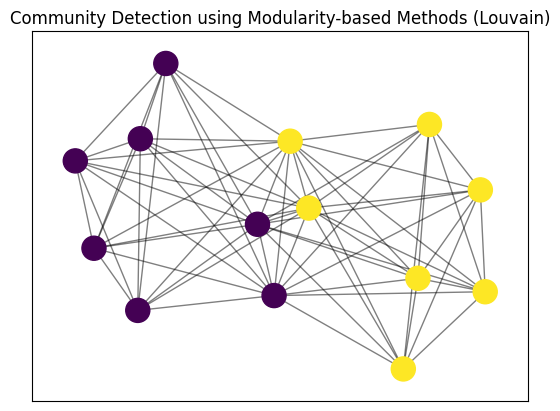

Node E1 belongs to Community 0
Node E2 belongs to Community 0
Node E3 belongs to Community 0
Node E4 belongs to Community 0
Node E5 belongs to Community 0
Node E6 belongs to Community 0
Node E7 belongs to Community 1
Node E8 belongs to Community 0
Node E9 belongs to Community 1
Node E10 belongs to Community 1
Node E11 belongs to Community 1
Node E12 belongs to Community 1
Node E13 belongs to Community 1
Node E14 belongs to Community 1


In [18]:
# Convert the graph to an undirected graph for community detection
C_undirected = C.to_undirected()
partition = community.best_partition(W_undirected)
comms = partition

# Apply the Louvain method to detect communities
# partition = community.best_partition(W_undirected)
from community import community_louvain as community

# Visualize the communities
pos = nx.spring_layout(C)
cmap = plt.get_cmap('viridis')
partition = community.best_partition(C_undirected)
comms = partition

nx.draw_networkx_nodes(C, pos, node_size=300, cmap=cmap, node_color=list(comms.values()))
nx.draw_networkx_edges(C, pos, alpha=0.5)
plt.title('Community Detection using Modularity-based Methods (Louvain)')
plt.show()

# Print community assignments for each node
for node, community_id in comms.items():
    print(f"Node {node} belongs to Community {community_id}")

#### **Cliques for Club Graph**

A clique result of [9, 9] indicates that there is a clique in the network consisting of two nodes, and each of these nodes has a degree of 9. In graph theory, a clique is a subset of nodes in a graph where every pair of nodes is connected by an edge.

A clique result of [9, 9] indicates that there is a clique in the network consisting of two nodes, and each of these nodes has a degree of 9. In graph theory, a clique is a subset of nodes in a graph where every pair of nodes is connected by an edge.

In [19]:
clique_list = list(nx.find_cliques(C))
[len(clique) for clique in clique_list]

[9, 9]

In [20]:
net = nx.Graph()
cliques = list(nx.find_cliques(C))

cliques

[['E6', 'E9', 'E8', 'E7', 'E3', 'E2', 'E5', 'E4', 'E1'],
 ['E6', 'E9', 'E8', 'E7', 'E10', 'E12', 'E14', 'E11', 'E13']]

#### **Bipartite Graph**

Now we examine the relationships between to the two modes of the bipartite graph. In the graph below, we see varying degrees of women who attend events and varing degrees of event attendance.

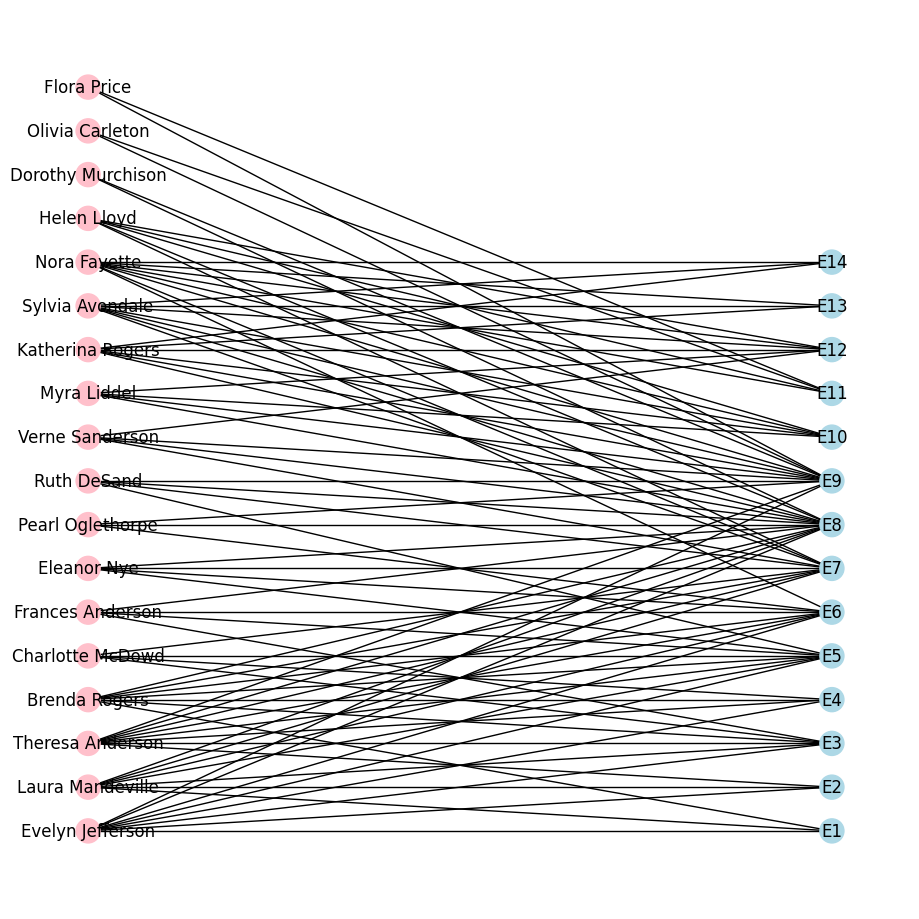

In [21]:
from networkx.algorithms import bipartite as bp

plt.figure(figsize=(9, 9))
pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(women) ) # put nodes from X at x=1
pos.update( (n, (2, i)) for i, n in enumerate(clubs) ) # put nodes from Y at x=2

# Assign yellow color to women nodes and use default color for club nodes
node_colors = ['pink' if node in women else 'lightblue' for node in G.nodes]

nx.draw(G, pos=pos, with_labels=True, node_color=node_colors)
plt.show()

#### **Table With The List Of Events Each Women Attended**

In [22]:
# Create a dictionary to store the list of events each woman attended
women_events = {woman: [] for woman in women}

# Iterate through the edges and populate the 'women_events' dictionary
for edge in G.edges():
    woman, event = edge
    if woman in women:
        women_events[woman].append(event)

# Create a PrettyTable to display the information
table = PrettyTable(['Woman', 'Events Attended'])

# Populate the PrettyTable with data
for woman, events in women_events.items():
    table.add_row([woman, ', '.join(events)])

# Print the table
print(table)




+-------------------+-------------------------------------+
|       Woman       |           Events Attended           |
+-------------------+-------------------------------------+
|  Evelyn Jefferson |    E1, E2, E3, E4, E5, E6, E8, E9   |
|  Laura Mandeville |      E1, E2, E3, E5, E6, E7, E8     |
|  Theresa Anderson |    E2, E3, E4, E5, E6, E7, E8, E9   |
|   Brenda Rogers   |      E1, E3, E4, E5, E6, E7, E8     |
|  Charlotte McDowd |            E3, E4, E5, E7           |
|  Frances Anderson |            E3, E5, E6, E8           |
|    Eleanor Nye    |            E5, E6, E7, E8           |
|  Pearl Oglethorpe |              E6, E8, E9             |
|    Ruth DeSand    |            E5, E7, E8, E9           |
|  Verne Sanderson  |           E7, E8, E9, E12           |
|    Myra Liddel    |           E8, E9, E10, E12          |
|  Katherina Rogers |      E8, E9, E10, E12, E13, E14     |
|  Sylvia Avondale  |    E7, E8, E9, E10, E12, E13, E14   |
|    Nora Fayette   | E6, E7, E9, E10, E

### **Questions to Answer**

#### **What can you infer about the relationships between the women?**

Women with high authority centrality are considered authoritative in the network. Theresa Anderson is identified as having the highest authority.

Eigenvector centrality identifies women who are well-connected to other well-connected women. Evelyn Jefferson has the highest eigenvector centrality.

PageRank measures the importance of a woman based on the importance of the women she is connected to. Theresa Anderson and Evelyn Jefferson have the highest PageRank scores.

Harmonic closeness centrality identifies women who are close to many other women in the network. Evelyn Jefferson has the highest harmonic closeness centrality.

Closeness centrality also measures how close a woman is to others in the network. Evelyn Jefferson is identified as having the highest closeness centrality.

Hubs are women who have many connections. Theresa Anderson and Evelyn Jefferson are identified as hubs in the network.

Degree centrality is based on the number of connections a woman has. Evelyn Jefferson has the highest degree centrality.

Betweenness centrality identifies women who act as bridges between different parts of the network. Evelyn Jefferson and Theresa Anderson have the highest betweenness centrality.

Evelyn Jefferson appears prominently in several centrality measures, indicating her strong influence and connections in the network.
Theresa Anderson, Ruth DeSand, and Brenda Rogers are also consistently ranked high across various centrality measures.
Sylvia Avondale has relatively lower scores in these centrality measures, suggesting she may be less central in the network.

These centrality measures provide insights into the importance, influence, and structural roles of women in the Davis Southern Club Women network. Women like Evelyn Jefferson and Theresa Anderson seem to play significant roles in connecting the network.

The community assignments suggest the presence of two main communities: Community 0 and Community 1. Women belonging to the same community are likely to have stronger connections or similar patterns of connections with other women within the same community.

Evelyn Jefferson, Laura Mandeville, Theresa Anderson, Brenda Rogers, Charlotte McDowd, Frances Anderson, Eleanor Nye, and Ruth DeSand belong to Community 0. These women form a cohesive group within the network and are strongly connected to each other. The community assignment suggests that they share common characteristics or are involved in similar social activities.

Pearl Oglethorpe, Verne Sanderson, Myra Liddel, Katherina Rogers, Sylvia Avondale, Nora Fayette, Helen Lloyd, Dorothy Murchison, Olivia Carleton, and Flora Price belong to Community 1. These women also form a distinct community within the network. The community assignment indicates that they are closely connected to each other and may have different characteristics or involvement compared to Community 0.

The presence of two communities suggests a certain level of segregation or differentiation in the social interactions within the network. The women within each community have stronger connections with each other than with women from the other community.

Evelyn Jefferson is a prominent member of Community 0, and Pearl Oglethorpe is a prominent member of Community 1.

Community assignments can help identify potential subgroups or clusters within the larger network. Nodes within the same community may share common characteristics, interests, or patterns of social engagement.

For Clustering Coefficient, Charlotte McDowd, Olivia Carleton, and Flora Price have a clustering coefficient of 1.0, suggesting that all their neighbors are connected to each other. They are at the center of tightly connected subgroups within the network.

Laura Mandeville, Brenda Rogers, Frances Anderson, Eleanor Nye, Pearl Oglethorpe, Ruth DeSand, Verne Sanderson, Myra Liddel, Katherina Rogers, Sylvia Avondale, Nora Fayette, Helen Lloyd, Dorothy Murchison have clustering coefficients close to 0.9, indicating strong local connections. Their neighbors are highly connected, and they may be part of cohesive subgroups.

Evelyn Jefferson, Theresa Anderson have a clustering coefficient slightly below 0.9, suggesting that their neighbors are also well-connected but to a slightly lesser extent.

These clustering coefficients provide insights into how tightly connected a woman's immediate neighbors are. Women with higher clustering coefficients are likely part of closely connected subgroups or communities within the larger network.

The value of 0.9366868969810146 for the average clustering coefficient suggests a network with a strong tendency for nodes to form local clusters or communities, indicating a significant degree of interconnectedness among neighboring nodes.

A transitivity of 0.9283962726826875 suggests a network with a strong tendency for nodes to form triangles and clusters, indicating a high level of interconnectedness and community structure in the overall network.

The Clique structure for Women Graph is the following:

Members: ['Verne Sanderson', 'Nora Fayette', 'Evelyn Jefferson', 'Helen Lloyd', 'Theresa Anderson', 'Sylvia Avondale', 'Ruth DeSand', 'Katherina Rogers', 'Dorothy Murchison', 'Pearl Oglethorpe', 'Myra Liddel', 'Flora Price', 'Olivia Carleton']
Size: 13
This clique consists of 13 women who have strong connections with each other in the network.

Members: ['Verne Sanderson', 'Nora Fayette', 'Evelyn Jefferson', 'Helen Lloyd', 'Theresa Anderson', 'Sylvia Avondale', 'Ruth DeSand', 'Katherina Rogers', 'Dorothy Murchison', 'Pearl Oglethorpe', 'Myra Liddel', 'Laura Mandeville', 'Frances Anderson', 'Eleanor Nye', 'Brenda Rogers']
Size: 15
This is a larger clique of 15 women, and it includes all members of Clique 1. It suggests a subset of women who have strong connections within themselves.

Members: ['Verne Sanderson', 'Nora Fayette', 'Evelyn Jefferson', 'Helen Lloyd', 'Theresa Anderson', 'Sylvia Avondale', 'Ruth DeSand', 'Charlotte McDowd', 'Frances Anderson', 'Laura Mandeville', 'Eleanor Nye', 'Brenda Rogers']
Size: 12
This clique of 12 women includes some members from the previous cliques. It represents another subset of women with strong connections.

The presence of overlapping members in these cliques suggests that certain women are tightly connected within multiple subgroups.

The network appears to have distinct subsets of women who have strong connections within those subsets, creating a modular or community structure.

These cliques provide insights into the structure of relationships within the network, highlighting groups of women who share strong connections.

#### **What can you infer about the relationships between the social events?**  

The uniformity in centrality scores across all events indicates a lack of variation in their roles within the network. Events seem to have similar levels of importance, connectivity, and influence.

The low values for hub and betweenness centrality suggest that events do not play significant bridging or connecting roles in the network.

Based on these centrality measures, the social events appear to have similar roles and importance within the network, without clear distinctions in terms of centrality.

The top 5 events based on authorities are E8, E6, E9, E7, and E3. These events are considered authoritative in the network.

The top 5 events based on eigenvector centrality are E6, E7, E8, E9, and E1. These events are well-connected to other well-connected events in the network.

The top 5 events based on PageRank are E6, E7, E8, E9, and E1. These events are considered important based on the importance of the events they are connected to.

The top 5 events based on harmonic closeness centrality are E6, E7, E8, E9, and E1. These events are close to many other events in the network.

The top 5 events based on closeness centrality are E6, E7, E8, E9, and E1. These events are close to other events in terms of the shortest paths.

The top 5 events based on hub score are E7, E9, E6, E8, and E10. These events have many connections in the network.

The top 5 events based on degree centrality are E6, E7, E8, E9, and E1. These events have a high number of connections.

The top 5 events based on betweenness centrality are E6, E7, E8, E9, and E1. These events act as bridges between different parts of the network.

The events E6, E7, E8, E9, and E1 consistently appear in the top 5 across various centrality measures, indicating their importance, influence, and structural roles in the network.

These events are not only well-connected and central but also play crucial roles in connecting different parts of the network.

These centrality measures provide insights into the importance, influence, and connectivity of events in the network, helping identify key events that play significant roles.

Community assignment is a result of community detection algorithms applied to the network. In this context, events within the same community are more densely connected to each other compared to events in different communities. This partitioning helps identify groups or clusters of events that share similar connectivity patterns within the network.

Events E1 to E5 belong to Community 0. Events E6, E9, E10, E11, E12, E13, and E14 belong to Community 1.

Events in Community 0 (E1 to E5) have stronger connections among themselves than with events in Community 1.

Events in Community 1 (E6, E9, E10, E11, E12, E13, E14) form a separate group with stronger connections among themselves.

Understanding these communities can provide insights into the underlying structure or functional groups within the social events network.

The Clique structure for Women Graph is the following:

In Clique 1, the nodes 'E9', 'E7', 'E8', 'E6', 'E14', 'E10', 'E12', 'E11', and 'E13' form a fully connected subgraph. Each node in this subgraph is directly connected to every other node within the same subgraph.

In Clique 2, the nodes 'E9', 'E7', 'E8', 'E6', 'E4', 'E1', 'E3', 'E5', and 'E2' form another fully connected subgraph.

These cliques represent highly interconnected subsets within the larger network, where every pair of nodes within each clique is connected by an edge. Cliques are useful for identifying tightly-knit communities or groups of nodes in a graph.

The following is a list of the events each women attended:

Evelyn Jefferson attended 8 events: E1, E2, E3, E4, E5, E6, E8, E9  

Laura Mandeville attended 7 events: E1, E2, E3, E5, E6, E7, E8  

Theresa Anderson attended 8 events: E2, E3, E4, E5, E6, E7, E8, E9

Brenda Rogers attended 7 events: E1, E3, E4, E5, E6, E7, E8

Charlotte McDowd attended 4 events: E3, E4, E5, E7   

Frances Anderson attended 4 events: E3, E5, E6, E8  

Eleanor Nye attended 4 events: E5, E6, E7, E8     

Pearl Oglethorpe attended 3 events: E6, E8, E9    

Ruth DeSand attended 4 events: E5, E7, E8, E9  

Verne Sanderson attended 4 events: E7, E8, E9, E12   

Myra Liddel attended 4 events: E8, E9, E10, E12  

Katherina Rogers attended 6 events: E8, E9, E10, E12, E13, E14  

Sylvia Avondale attended 7 events: E7, E8, E9, E10, E12, E13, E14

Nora Fayette attended 8 events: E6, E7, E9, E10, E11, E12, E13, E14

Helen Lloyd attended 5 events: E7, E8, E10, E11, E12    

Dorothy Murchison attended 2 events: E8, E9

Olivia Carleton attended 2 events: E9, E11  

Flora Price attended 2 events: E9, E11   